In [1]:
import pandas as pd
import numpy as np

In [2]:
df =  pd.read_csv("train.csv")

In [3]:
df.shape

(24236806, 10)

In [4]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
df.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [6]:
from datetime import datetime
df['date'] = pd.to_datetime(df['timestamp'], unit = 's')
df = df.sort_values('date')
groups = pd.factorize(df['date'].dt.day.astype(str) + '_' + df['date'].dt.month.astype(str) + '_' + df['date'].dt.year.astype(str))[0]

In [7]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [8]:
btc = df[df["Asset_ID"]==1].set_index("date")

In [9]:
import plotly.graph_objects as go
btc_mini = btc.iloc[-200:]
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.show()

In [10]:
import pickle as pkl
pickle_out = open("btc_mini.pkl","wb")
pkl.dump(btc_mini,pickle_out)
pickle_out.close()

In [11]:
btc.dropna(axis=0, inplace=True)

In [12]:
(btc.index[1:]-btc.index[:-1]).value_counts().head()

0 days 00:01:00    1955857
0 days 00:02:00         59
0 days 00:03:00         14
0 days 00:04:00          5
0 days 00:10:00          5
Name: date, dtype: int64

In [13]:
btc.drop(columns=['timestamp','Asset_ID'],axis=1,inplace=True)

In [14]:
y = btc['Target']
X = btc.drop(columns=['Target'],axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(btc)

array([[0.0026064 , 0.17330815, 0.17557271, ..., 0.00303219, 0.17315766,
        0.35025569],
       [0.00267499, 0.17330559, 0.17619646, ..., 0.00298379, 0.17337341,
        0.34787695],
       [0.00602444, 0.17312497, 0.17535561, ..., 0.00529185, 0.17281711,
        0.37647088],
       ...,
       [0.03019079, 0.64264759, 0.64238829, ..., 0.01128583, 0.64230913,
        0.4576161 ],
       [0.02438355, 0.64247516, 0.6421323 , ..., 0.00750114, 0.6423083 ,
        0.45557235],
       [0.02473793, 0.64152656, 0.64117156, ..., 0.00831511, 0.64119292,
        0.45530315]])

In [16]:
#btc=btc.values

In [17]:
X

,Count,Open,High,Low,Close,Volume,VWAP
date,,,,,,,
2018-01-01 00:01:00,229.0,13835.19400,14013.80,13666.11,13850.176000,31.550062,13827.062093
2018-01-01 00:02:00,235.0,13835.03600,14052.30,13680.00,13828.102000,31.046432,13840.362591
2018-01-01 00:03:00,528.0,13823.90000,14000.40,13601.00,13801.314000,55.061820,13806.068014
2018-01-01 00:04:00,435.0,13802.51200,13999.00,13576.28,13768.040000,38.780529,13783.598101
2018-01-01 00:05:00,742.0,13766.00000,13955.90,13554.44,13724.914000,108.501637,13735.586842
...,...,...,...,...,...,...,...
2021-09-20 23:40:00,2643.0,42632.46500,42736.90,42607.50,42703.636250,100.797218,42653.031385
2021-09-20 23:41:00,2281.0,42718.81500,42819.38,42690.84,42781.970571,76.339988,42755.785162
2021-09-20 23:42:00,2642.0,42772.92125,42827.10,42690.75,42755.592500,117.429123,42749.075916


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=0)

In [19]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [20]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [22]:
X_train.shape

(1564782, 7, 1)

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,activation='relu',input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,verbose=1,epochs=10,batch_size=128)

Epoch 1/10
 4168/12225 [=========>....................] - ETA: 4:14 - loss: 3.5920e-05

KeyboardInterrupt: 

In [ ]:
model.save("btc.h5")

<AxesSubplot:>

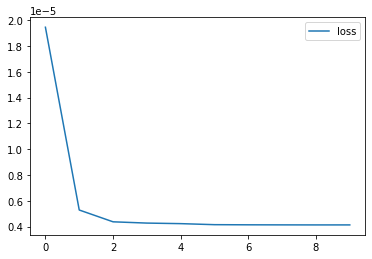

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
y_test = np.array(y_test)

In [ ]:
X_test.shape

(391196, 7, 1)

In [ ]:
y_test = y_test.reshape(391196,1)

In [ ]:
X_test[0].shape

(7, 1)

In [ ]:
pred=model.predict(X_test)
#pred=scaler.inverse_transform(pred)
pred

array([[-0.00020451],
       [-0.00020451],
       [-0.00020452],
       ...,
       [-0.00020454],
       [-0.00019498],
       [-0.00020451]], dtype=float32)

In [ ]:
pred.shape

(391196, 1)

In [ ]:
rmse=np.sqrt(np.mean(((pred-y_test)**2)))
rmse

0.0020081863686214124